# Markdown

## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import Libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set up Splinter
my_service = Service(executable_path=r'C:\Users\gregw\OneDrive\Desktop\chromedriver-win64\chromedriver.exe')
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

### Step 3: Store the data

In [6]:
# Create an empty list
row_list = []
# Loop through the scraped data to create a list of rows
for index, row in enumerate(rows):
    if index == 0:
        headers = [row.text for row in row.find_all('th')]
    else:
        row_data = [x.text for x in row.find_all('td')]
        row_dict = {}
        for header, data in zip(headers, row_data):
            row_dict[header] = data 
        row_list.append(row_dict)

In [7]:
df = pd.DataFrame(row_list)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare the Data for Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [9]:
# Changing data types 
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

In [10]:
# 1. How many months are there on Mars?
month = df.groupby(['month'])['month'].count()
month

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].count()
martian_days

1867

In [12]:
# 3. What is the average low temperature by month?
avg_temp = df.groupby(['month'])['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

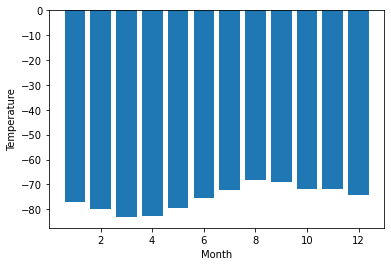

In [13]:
# Plot the average temperature by month
plt.bar(avg_temp.index, avg_temp.values)
plt.ylabel("Temperature")
plt.xlabel("Month")
plt.show()

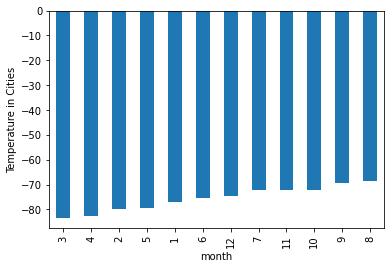

In [14]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp.sort_values(ascending=True).plot.bar()
plt.ylabel("Temperature in Cities")
plt.show()

The coldest month on Mars was Month 3 and the warmest month on Mars was Month 8. Although both temperatures are far below any temperature on Earth.

In [15]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(['month'])['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

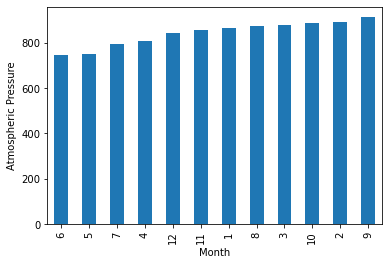

In [16]:
avg_pressure.sort_values(ascending=True).plot.bar()
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.show()

The atmospheric pressure was at its lowest at month 6 and highest at month 9.

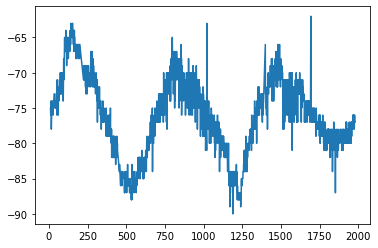

In [17]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x_values = df['sol']
y_values = df['min_temp']
plt.plot(x_values, y_values)
plt.show()

The difference from when the data started at 0 to when it next reaches that looks to be at around 675 days. On google I found that there is 687 days in a martian year

In [18]:
# Export Data to csv
df.to_csv("mars_table.csv", index=False)

In [19]:
browser.quit()